In [1]:
#import all libary

     Dataset Description
     The dataset originally has 22 features (columns),
     but based on diabetes disease research regarding 
     factors influencing diabetes disease and other
     chronic health conditions, only select features
     are included in this analysis. 

     The dataset contains the following information:

    1- Diabetes_binary : 0 = no diabetes, 1=diabetes

    2- HighBP (High blood pressure ): 0 = no high BP 1 = 
    high 

    3-HighChol: 0 = no high cholesterol 1 = high cholesterol
    4-CholCheck: 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
    5-BMI: Body Mass 
    6-Smoker: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes
    7-Stroke: (Ever told) you had a stroke. 0 = no 1 = yes
    8-PhysActivity: physical activity in past 30 days - not including job 0 = no 1 = yes
    9- Fruits: Consume Fruit 1 or more times per day 0 = no 1 = yes
    10- Weight in gms: It is the weight in grams
    11-Veggies: Consume Vegetables 1 or more times per day 0 = no 1 = yes
    12- HvyAlcoholConsump : (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes
    13-AnyHealthcare: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
    14-NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes
    15-GenHlth: Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
    16- MentHlth: days of poor mental health scale 1-30 days
    17- PhysHlth: physical illness or injury days in past 30 days scale 1-30
    18-DiffWalk: Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
    19-Sex: 0 = female 1 = male\n",
    20 -Age: 13-level age category / 1 = 18-24 9 = 60-64 13 = 80 or older
    21- Education : Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = elementary 
    22-Income: Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

Loading Dataset

In [3]:
Diabetes =pd.read_csv('diabetes.csv')

In [4]:
#print out a few lines

In [5]:
Diabetes.head() #print 5 line of data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
# some of  absorvation represent binary value 0,1 

Exploratory data analysis (EDA)

In [7]:
print('Dimension of Diabetes Date : {}'.format(Diabetes.shape))

Dimension of Diabetes Date : (253680, 22)


In [8]:
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

General observations

    The dataset have 253680 observations,

    22 columns and with no null values.
    The data types of the variables are float64

In [9]:
Diabetes.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Checking the missing vlaues

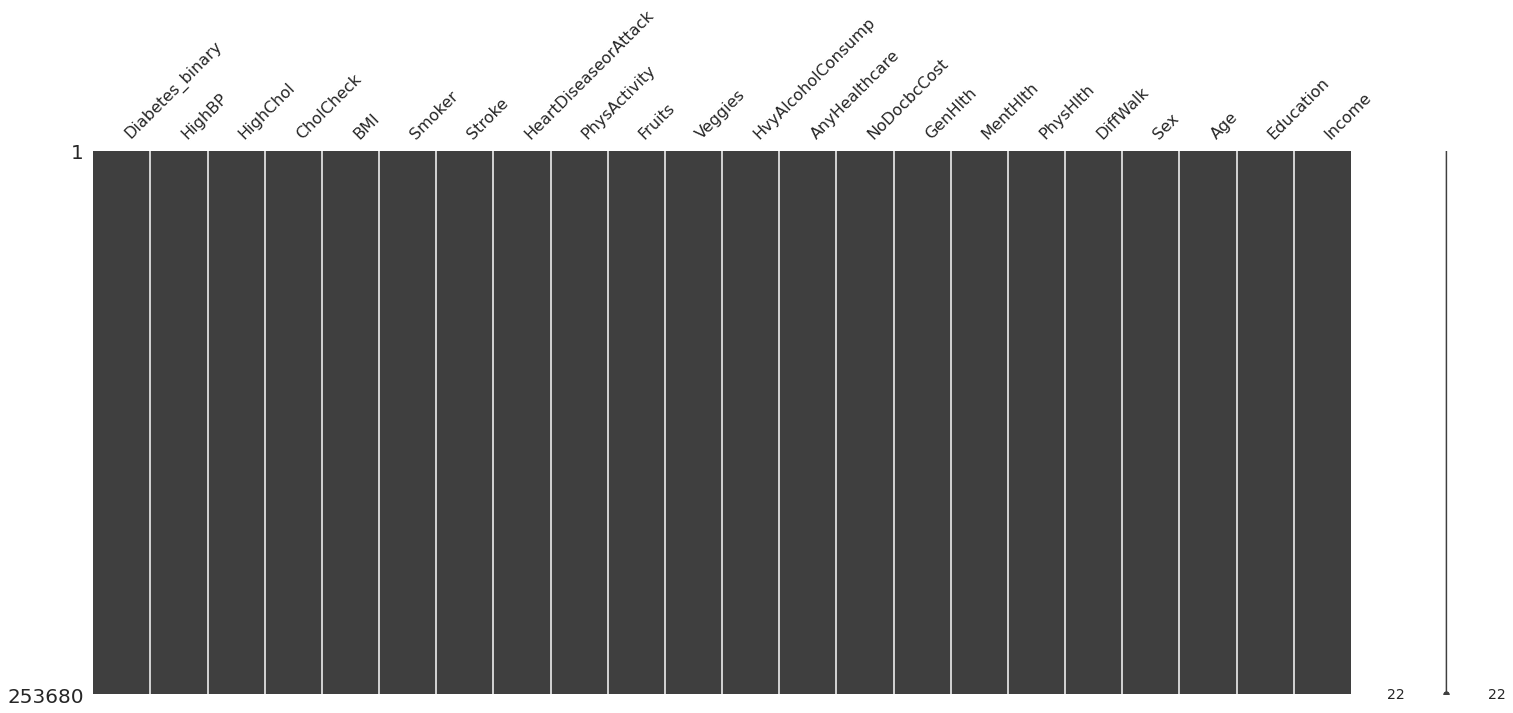

In [10]:
# import missingo library
import missingno
#visualisa null values
missingno.matrix(Diabetes)

In [11]:
Diabetes.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Outcomes:

    no missing value found

In [12]:
#Get overall idea of the distribution of all columns using hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52c7f6fd90>,
      dtype=object)

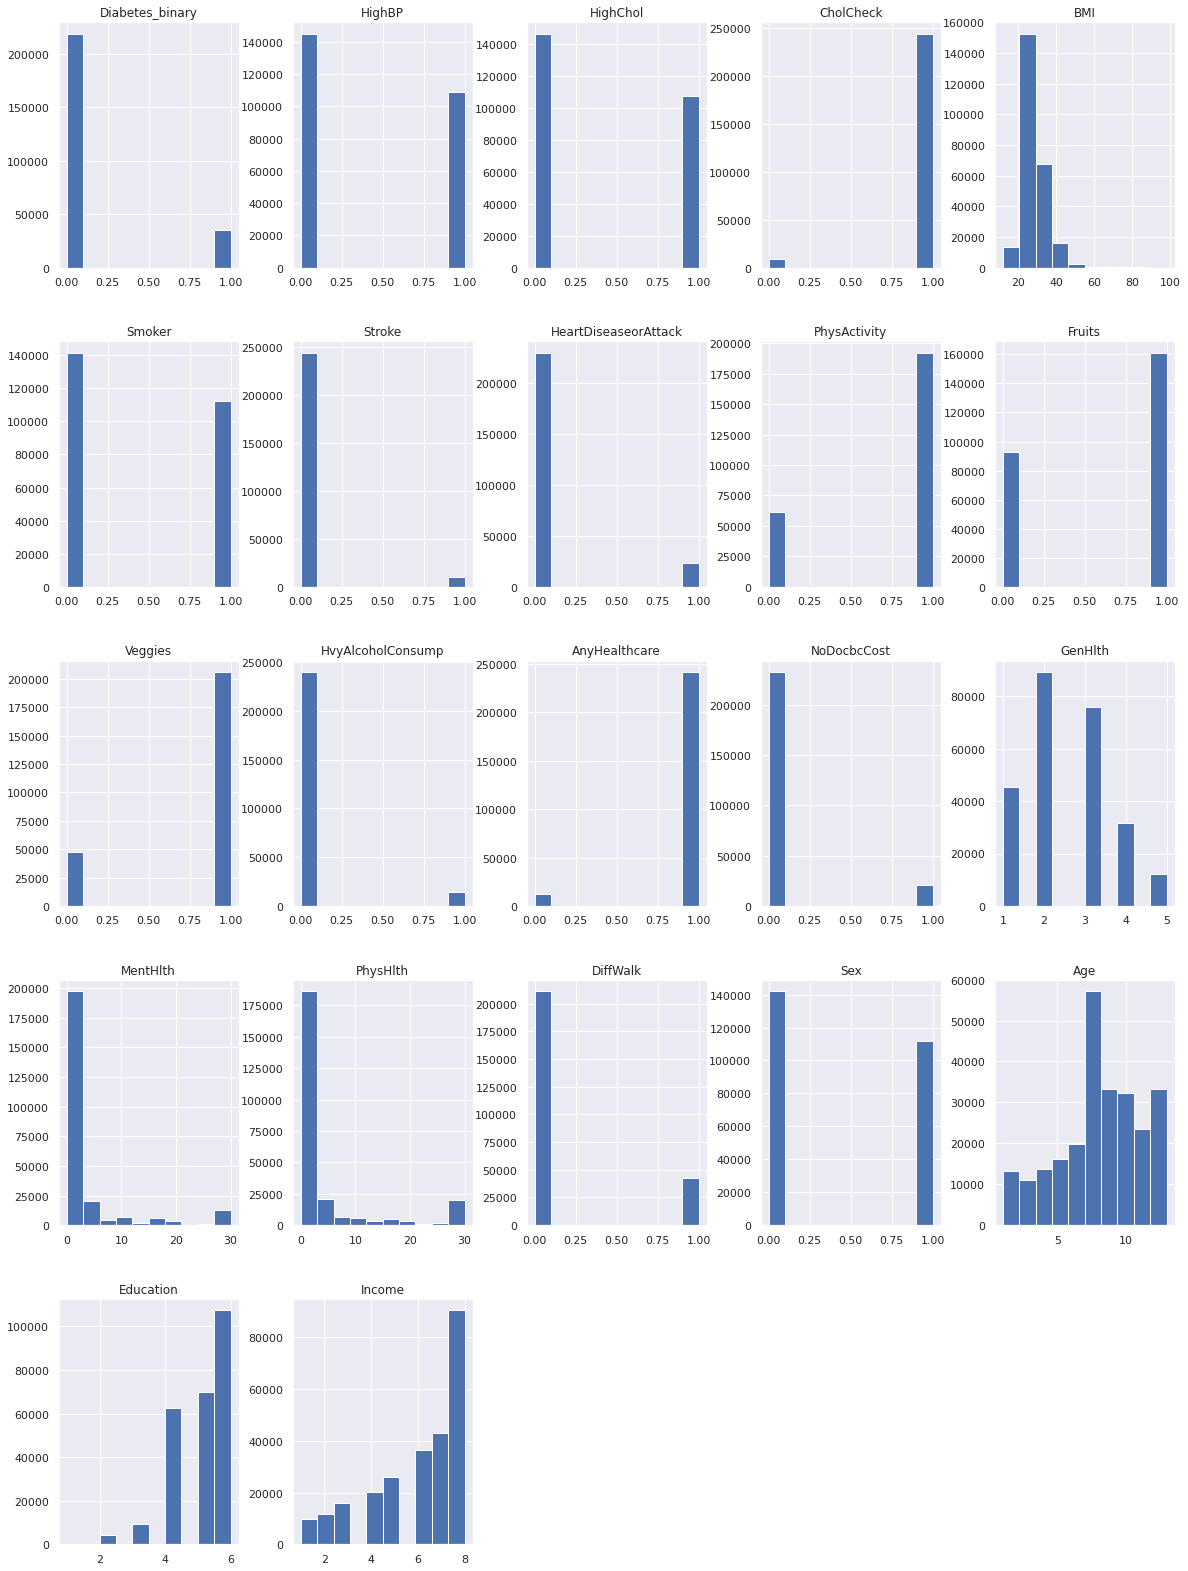

In [13]:
Diabetes.hist(figsize=(20,28))

### Outcomes
    
    Diabetes_binary is imbalanced which means number 
    of people with no diabetes is more than number
    of people with diabetes.

    Age , income is left -skewed

Questions :

    1- what is the incidence rate of Diabetics and   non-Diabetics?

    2- What is the rate of Diabetes by Sex ?

    3- Do people with diabetes have high blood pressure?

    4- Do people with diabetes have high cholesterol?

    5- What age is most affected by diabetes?

1- what is the incidence rate of Diabetics and non-Diabetics? 

Text(0.5, 1.0, 'The Incidence Rate of Diabetics and non-Diabetics')

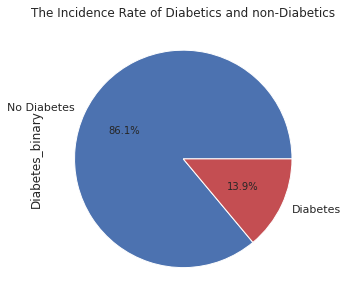

In [14]:
colors = ["b","r"]
labels = ["No Diabetes","Diabetes"]
Diabetes.Diabetes_binary.value_counts().plot.pie(labels = labels, figsize=(5,5), autopct='%1.1f%%',colors = colors)
plt.title("The Incidence Rate of Diabetics and non-Diabetics")

Outcomes

    Percentage of people with diabetes represents 13.9%
    Percentage of people with no-diabetes represents 86.1%


In [15]:
#Change /encode for value ,Let's start with Sex Columns , change value form(0,1) to(F,M)

In [16]:
Diabetes.loc[Diabetes["Sex"] == 0,"Sex"] = 'F'
Diabetes.loc[Diabetes["Sex"] == 1,"Sex"] = 'M'
#cheack value 
Diabetes.Sex.value_counts()

F    141974
M    111706
Name: Sex, dtype: int64

    Famel is more than of Male

In [17]:
#change value for Diabetes_binary Columns , change value form(0,1) to(No Diabetes,Diabetes)

In [18]:
Diabetes.loc[Diabetes["Diabetes_binary"] == 0,"Diabetes_binary"] = 'No Diabetes'
Diabetes.loc[Diabetes["Diabetes_binary"] == 1,"Diabetes_binary"] = 'Diabetes'
#cheack value 
Diabetes.Diabetes_binary.value_counts()

No Diabetes    218334
Diabetes        35346
Name: Diabetes_binary, dtype: int64

    No Diabetes More than of Diabetes

2- What is the rate of Diabetes by Sex ?

In [19]:
Percentage_of_infected=pd.DataFrame(Diabetes.groupby('Sex')['Diabetes_binary'].count()).apply(lambda x : x / sum(x) * 100)
Percentage_of_infected

,Diabetes_binary
Sex,
F,55.965784
M,44.034216


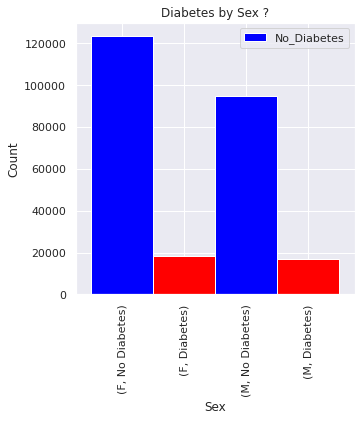

In [20]:
Diabetes_by_sex= Diabetes.groupby('Sex').Diabetes_binary.value_counts().plot(kind='bar',width =1,figsize=(5,5), color=['Blue','red'])
Diabetes_by_sex.set_title("Diabetes by Sex ?")
plt.ylabel("Count")
plt.xlabel("Sex")
plt.legend(['No_Diabetes','Diabetes']);
plt.show()

Outcomes:

    number of female with No_Diabetes is higher than males
    rate of female with Diabetes =55
    rate of males with Diabetes =44


 3-Do people with diabetes have high blood pressure?


In [21]:
#change value for HighBP Columns , change value form(0,1) to(No high blood pressure,Have high blood pressure)

In [22]:
#value for HighBP was represent 0,1

In [23]:
Diabetes['HighBP'].value_counts()

0.0    144851
1.0    108829
Name: HighBP, dtype: int64

In [24]:
Diabetes.loc[Diabetes["HighBP"] == 0,"HighBP"] = 'No high blood pressure'
Diabetes.loc[Diabetes["HighBP"] == 1,"HighBP"] = 'Have high blood pressure'
Diabetes['HighBP'].value_counts()

No high blood pressure      144851
Have high blood pressure    108829
Name: HighBP, dtype: int64

In [25]:
#No high blood pressure is more than form Have high blood pressure

In [26]:
#visualization 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


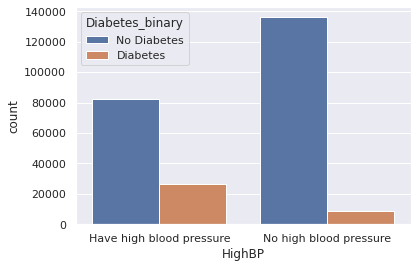

In [27]:
sns.countplot(Diabetes.HighBP,hue='Diabetes_binary',data=Diabetes)

Outcomes:


    Diabetics who have high blood pressure is 
    higher than the percentage of diabetics
    who do not have high blood pressure



 4-Do people with diabetes have high cholesterol?


In [28]:
##change value for HighChol Columns , change value form(0,1) to(No high Cholesterol,Have high Cholesterol)

In [29]:
##value for HighChol was represent 0,1

In [30]:
Diabetes['HighChol'].value_counts()

0.0    146089
1.0    107591
Name: HighChol, dtype: int64

In [31]:
Diabetes.loc[Diabetes["HighChol"] == 0,"HighChol"] = 'No high Cholesterol'
Diabetes.loc[Diabetes["HighChol"] == 1,"HighChol"] = 'Have high Cholesterol'
Diabetes['HighChol'].value_counts()

No high Cholesterol      146089
Have high Cholesterol    107591
Name: HighChol, dtype: int64

In [32]:
#No high Cholesterol is more than form Have high Cholesterol

In [33]:
##visualization 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


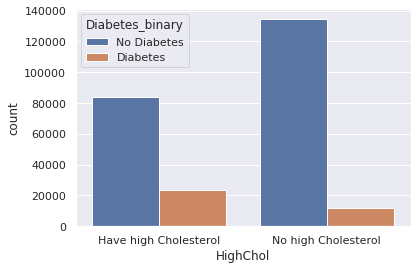

In [34]:
sns.countplot(Diabetes.HighChol,hue='Diabetes_binary',data=Diabetes)

Outcomes:

    number of people who have Diabetes with high Cholesterol 
    is higher than number of people who have Diabetes with no high Cholesterol.



5-What age is most affected by diabetes?


In [35]:
Diabetes['Age'].value_counts()

9.0     33244
10.0    32194
8.0     30832
7.0     26314
11.0    23533
6.0     19819
13.0    17363
5.0     16157
12.0    15980
4.0     13823
3.0     11123
2.0      7598
1.0      5700
Name: Age, dtype: int64

In [36]:
##change dtype for age to int
Diabetes['Age'] = Diabetes['Age'].astype(np.int64)
#check for value 
Diabetes['Age'].value_counts()

9     33244
10    32194
8     30832
7     26314
11    23533
6     19819
13    17363
5     16157
12    15980
4     13823
3     11123
2      7598
1      5700
Name: Age, dtype: int64

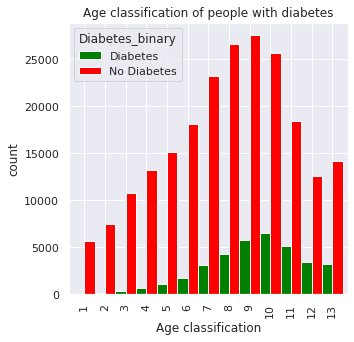

In [37]:
age = Diabetes.groupby('Age')['Diabetes_binary'].value_counts().unstack().plot(kind='bar',width =1,figsize=(5,5), color=['green','red'])
age.set_title("Age classification of people with diabetes")
age.set_xlabel('Age classification')
age.set_ylabel('count')
plt.show()

Outcomes:

age classification is skewed to the left. which means

    the percentage of people who are between the level 3-13 have a diabetes more than the rest.
    
    number of people who have no diabetes is higher

hint: Age: 13-level age category

    1 = 18-24

    9 = 60-64

    13 = 80 or older



In [38]:
#Encoding value form string to binary 0-1 for Diabetes_binary,HighBP,HighChol,Sex columns

In [40]:
# encode value to 0,1 Because the model does not accept a String value

In [41]:
Diabetes_binary_dict = {
    'No Diabetes' : 0,
    'Diabetes' : 1
}
Diabetes.Diabetes_binary.map(Diabetes_binary_dict) 
Diabetes['Diabetes_binary'] =Diabetes.Diabetes_binary.map(Diabetes_binary_dict) 
Diabetes.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,Have high blood pressure,Have high Cholesterol,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,F,9,4.0,3.0
1,0,No high blood pressure,No high Cholesterol,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,F,7,6.0,1.0
2,0,Have high blood pressure,Have high Cholesterol,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,F,9,4.0,8.0
3,0,Have high blood pressure,No high Cholesterol,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,F,11,3.0,6.0
4,0,Have high blood pressure,Have high Cholesterol,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,F,11,5.0,4.0


In [ ]:
#check value

In [42]:
Diabetes['Diabetes_binary'].value_counts()

0    218334
1     35346
Name: Diabetes_binary, dtype: int64

In [43]:
HighBP_dict = {
    'No high blood pressure' : 0,
    'Have high blood pressure' : 1
}
Diabetes.HighBP.map(HighBP_dict) 
Diabetes['HighBP'] =Diabetes.HighBP.map(HighBP_dict) 
Diabetes.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,Have high Cholesterol,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,F,9,4.0,3.0
1,0,0,No high Cholesterol,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,F,7,6.0,1.0
2,0,1,Have high Cholesterol,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,F,9,4.0,8.0
3,0,1,No high Cholesterol,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,F,11,3.0,6.0
4,0,1,Have high Cholesterol,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,F,11,5.0,4.0


In [44]:
HighChol_dict = {
    'No high Cholesterol' : 0,
    'Have high Cholesterol' : 1
}
Diabetes.HighChol.map(HighChol_dict) 
Diabetes['HighChol'] =Diabetes.HighChol.map(HighChol_dict) 
Diabetes['HighChol'].value_counts()

0    146089
1    107591
Name: HighChol, dtype: int64

In [45]:
Sex_dict = {
    'F' : 0,
    'M' : 1
}
Diabetes.Sex.map(Sex_dict) 
Diabetes['Sex'] =Diabetes.Sex.map(Sex_dict) 
Diabetes['Sex'].value_counts()

0    141974
1    111706
Name: Sex, dtype: int64

In [46]:
##change Data type for columns form flot to int

In [47]:

Diabetes['CholCheck'] = Diabetes['CholCheck'].astype(np.int64)
Diabetes['BMI'] = Diabetes['BMI'].astype(np.int64)
Diabetes['Smoker'] = Diabetes['Smoker'].astype(np.int64)
Diabetes['Stroke'] = Diabetes['Stroke'].astype(np.int64)
Diabetes['HeartDiseaseorAttack'] = Diabetes['HeartDiseaseorAttack'].astype(np.int64)
Diabetes['PhysActivity'] = Diabetes['PhysActivity'].astype(np.int64)
Diabetes['Fruits'] = Diabetes['Fruits'].astype(np.int64)
Diabetes['Veggies'] = Diabetes['Veggies'].astype(np.int64)
Diabetes['HvyAlcoholConsump'] = Diabetes['HvyAlcoholConsump'].astype(np.int64)
Diabetes['AnyHealthcare'] = Diabetes['AnyHealthcare'].astype(np.int64)
Diabetes['NoDocbcCost'] = Diabetes['NoDocbcCost'].astype(np.int64)
Diabetes['GenHlth'] = Diabetes['GenHlth'].astype(np.int64)
Diabetes['MentHlth'] = Diabetes['MentHlth'].astype(np.int64)
Diabetes['PhysHlth'] = Diabetes['PhysHlth'].astype(np.int64)
Diabetes['DiffWalk'] = Diabetes['DiffWalk'].astype(np.int64)
Diabetes['Education'] = Diabetes['Education'].astype(np.int64)
Diabetes['Income'] = Diabetes['Income'].astype(np.int64)
Diabetes['Sex'] = Diabetes['Sex'].astype(np.int64)

In [48]:
#check dtype for datset 
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [49]:
#all data type for columns change from float to int

Check blance for tragt class

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52c4404990>]],
      dtype=object)

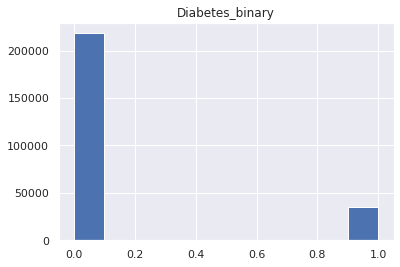

In [50]:
Diabetes.hist('Diabetes_binary')#imbalanced Class

In [51]:
##imbalanced (target class)

Discover good features 

    use heatmap

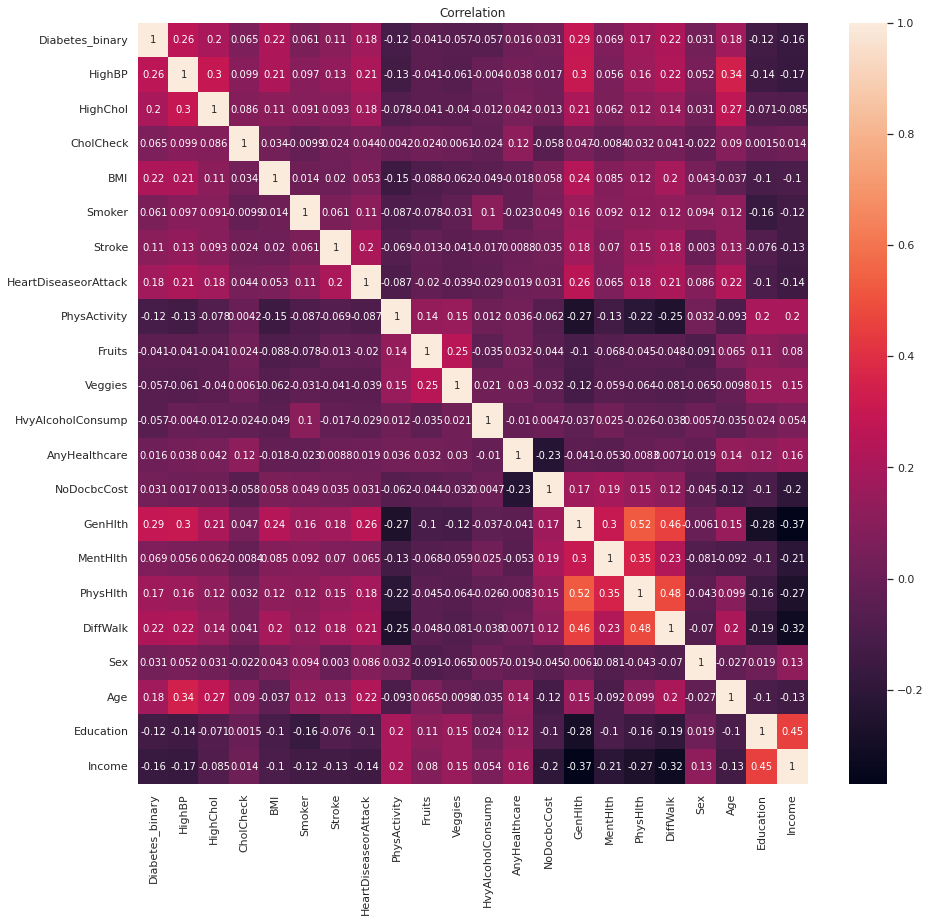

In [52]:

plt.figure(figsize = (15,14))
sns.heatmap(Diabetes.corr() ,annot = True)
plt.title("Correlation")
plt.show()

    good features
    
    Eduction
    income 
    age
    HighBp
    Genhealth 
    Physhlth
    DiffWalk 

Modeling 

Logistic Regression and KNeighborsClassifier

Separate the data to training and testing

        x represent all features
        y represent target class ,Diabetes_binary

In [53]:
#Separate the data to training and testing
#x take all features , y is targt class 
X = Diabetes.drop('Diabetes_binary', axis = 1)
y = Diabetes['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [54]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(202944, 21)
(202944,)
(50736, 21)
(50736,)


In [ ]:
#Handling imbalanced data use SMOTE 
#is one of the most commonly used oversampling method to solve the imbalance problem 

In [55]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 28349
Before OverSampling, counts of label '0': 174595 

After OverSampling, the shape of train_X: (349190, 21)
After OverSampling, the shape of train_y: (349190,) 

After OverSampling, counts of label '1': 174595
After OverSampling, counts of label '0': 174595


Logistic Regression

In [56]:
# first Model with all features (Logistic Regression)

In [57]:
#I choose two Model Logistic Regression and KNeighborsClassifier
# Logistic Regression
Ml = LogisticRegression()
fit_m = Ml.fit(X_train_res, y_train_res.ravel())
pred = fit_m.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [58]:
Ml.score(X_train_res, y_train_res.ravel())

0.7366934906497895

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7221302428256071

In [60]:
#compare between tarining = 0.73  and (y_test,pred) =0.72 is fiting

In [61]:
#use classification_report 

In [62]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82     43739
           1       0.29      0.68      0.40      6997

    accuracy                           0.72     50736
   macro avg       0.61      0.70      0.61     50736
weighted avg       0.84      0.72      0.76     50736



In [64]:
#use confusion_metrix

In [65]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
print(confusion_matrix(y_test,pred))

[[31881 11858]
 [ 2240  4757]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


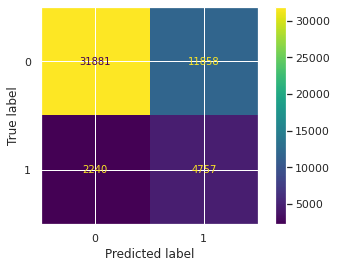

In [66]:
plot_confusion_matrix(Ml,X_test,y_test)

In [67]:
#Ml is fit 
#Accuracy = 0.72

 KNeighborsClassifier

In [68]:
# second Model with all features (#KNeighborsClassifier)

In [69]:
#KNeighborsClassifier
Model = KNeighborsClassifier(n_neighbors=2)
fitmodel = Model.fit(X_train_res, y_train_res.ravel())
pred = fitmodel.predict(X_test)

In [70]:
#calculate and compare between tarining value and (y_test,pred) value

In [72]:
#Ml.score(X_train_res, y_train_res.ravel())

In [73]:
#accuracy_score(y_test, pred)

In [71]:
#use classification_report 

In [74]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     43739
           1       0.29      0.26      0.27      6997

    accuracy                           0.81     50736
   macro avg       0.59      0.58      0.58     50736
weighted avg       0.80      0.81      0.81     50736



In [75]:
#use confusion_matrix

In [76]:
print(confusion_matrix(y_test,pred))

[[39322  4417]
 [ 5194  1803]]


In [110]:
 #visulaztion plot_confusion_matrix(Ml,X_test,y_test)

In [79]:
#Acuuracy for  second Model = 0.81

In [80]:
#Comparison of the two models

In [81]:
#KNeighbors better form logistic 
# prformance for KNN 0.81 ,but logistic 0.72

 Now take good feature for train and test model 

Good features

    Eduction 

    income 

    age

    HighBp

    Genhealth 

    Physhlth

    diffWalk

    ManHealth

Separate the data to training and testing

    x represent good features
    y represent target class ,Diabetes_binary

In [82]:
X = Diabetes.drop(['Diabetes_binary','HighChol','CholCheck','BMI','Smoker','Stroke','HeartDiseaseorAttack',
                    'PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost'
                    ,'Sex'] ,axis = 1)
y = Diabetes['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [83]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(202944, 8)
(202944,)
(50736, 8)
(50736,)


In [84]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sl= SMOTE(random_state = 2)
X_train_res_2, y_train_res_2 = sl.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 28349
Before OverSampling, counts of label '0': 174595 

After OverSampling, the shape of train_X: (349190, 21)
After OverSampling, the shape of train_y: (349190,) 

After OverSampling, counts of label '1': 174595
After OverSampling, counts of label '0': 174595


Logistic Regression

In [85]:
#third Model with good features (Logistic Regression)

In [86]:
Model3 = LogisticRegression()
fit_m = Model3.fit(X_train_res_2, y_train_res_2.ravel())
pred = fit_m.predict(X_test)

In [87]:
#calculate and compare between tarining Secore and (y_test,pred) Accuracy secore

In [88]:
Model3.score(X_train_res_2, y_train_res_2.ravel())

0.7116097253644148

In [89]:
accuracy_score(y_test, pred)

0.7006267738883633

In [90]:
#compare between tarining = 0.71 and (y_test,pred) =0.70 is fiting

In [91]:
# use classification_report

In [92]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.69      0.80     43739
           1       0.28      0.76      0.41      6997

    accuracy                           0.70     50736
   macro avg       0.62      0.73      0.61     50736
weighted avg       0.86      0.70      0.75     50736



In [93]:
#use confusion Matrix

In [94]:
print(confusion_matrix(y_test,pred))

[[30220 13519]
 [ 1670  5327]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


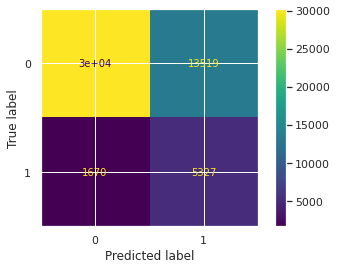

In [95]:
plot_confusion_matrix(Model3,X_test,y_test)

In [96]:
#Third Model is fit 
#Acuuracy  = 0.70

KNeighborsClassifier

In [97]:
#fourth Model (KNeighborsClassifier)

In [98]:
#KNeighborsClassifier
Model4 = KNeighborsClassifier(n_neighbors=2)
fitmodel = Model4.fit(X_train_res_2, y_train_res_2.ravel())
pred = fitmodel.predict(X_test)

In [99]:
#calculate and compare between tarining Secore and (y_test,pred) Accuracy secore

In [100]:
Model4.score(X_train_res_2, y_train_res_2.ravel())

0.6923394140725679

In [101]:
accuracy_score(y_test, pred)

0.8332347839798171

In [102]:
#compare between tarining = 0.69 and (y_test,pred) =0.83 is underfit

In [103]:
#use classification_report

In [104]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91     43739
           1       0.29      0.15      0.19      6997

    accuracy                           0.83     50736
   macro avg       0.58      0.54      0.55     50736
weighted avg       0.79      0.83      0.81     50736



In [105]:
#Accuracy for fourth model = 0.83

In [106]:
print(confusion_matrix(y_test,pred))

[[41258  2481]
 [ 5980  1017]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


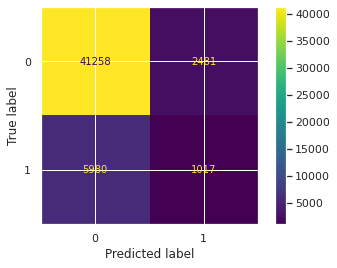

In [107]:
plot_confusion_matrix(Model4,X_test,y_test)

In [108]:
#fourth Model is better of all Model  becues Accurcy =0.83